In [78]:
import FinanceDataReader as fdr 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [52]:
kospi= fdr.DataReader("KS11","2015")
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057
2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055
2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174
2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007
2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111


In [53]:
kospi.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-03-23,3004.74,3038.25,3058.79,3003.05,1.330000e+09,-0.0101
2021-03-24,2996.35,2996.32,3006.54,2971.04,9.784300e+08,-0.0028
2021-03-25,3008.33,2995.67,3024.63,2987.83,9.403500e+08,0.0040
2021-03-26,3041.01,3012.79,3041.86,3012.79,1.040000e+09,0.0109
2021-03-29,3046.91,3047.71,3054.21,3025.39,5.915100e+05,0.0019


In [64]:
sp = fdr.DataReader("US500","2015")
sp.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-03-22,3940.59,3916.48,3955.31,3914.16,0.0,0.0070
2021-03-23,3910.52,3937.60,3949.13,3901.57,0.0,-0.0076
2021-03-24,3889.14,3919.93,3942.08,3889.07,0.0,-0.0055
2021-03-25,3909.52,3879.34,3919.54,3853.50,0.0,0.0052
2021-03-26,3974.54,3917.12,3978.19,3917.12,0.0,0.0166


In [65]:
sp.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2015-01-02,2058.20,2058.90,2072.36,2046.04,0.0,-0.0003
2015-01-05,2020.58,2054.44,2054.44,2017.34,0.0,-0.0183
2015-01-06,2002.61,2022.15,2030.25,1992.44,0.0,-0.0089
2015-01-07,2025.90,2005.55,2029.61,2005.55,0.0,0.0116
2015-01-08,2062.14,2030.61,2064.08,2030.61,0.0,0.0179


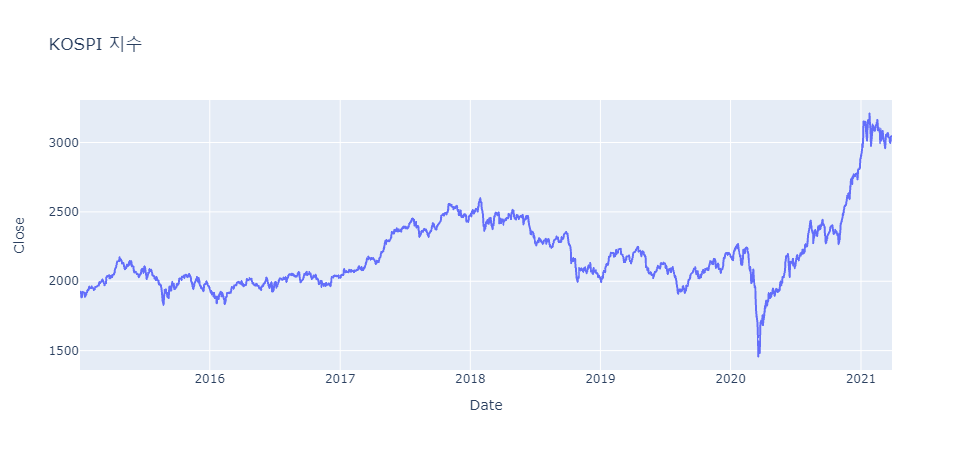

In [67]:
px.line(kospi, y="Close", title = "KOSPI 지수")

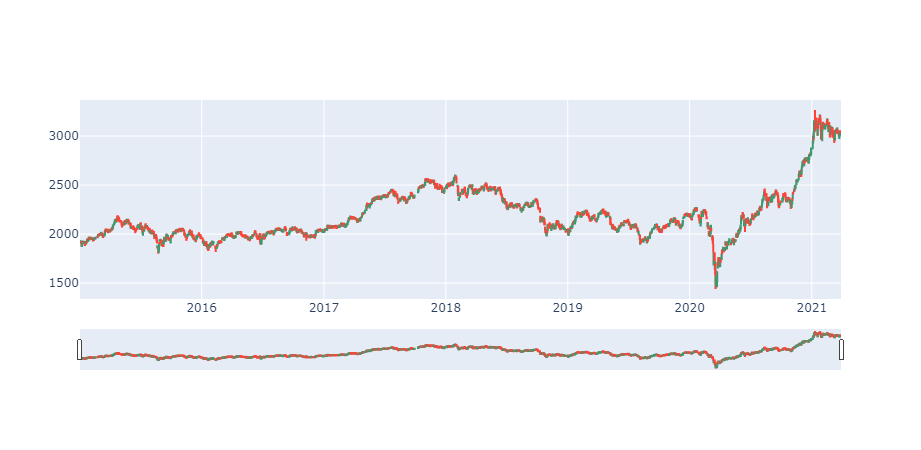

In [80]:
fig_kospi = go.Figure(data=[go.Candlestick(x=kospi.index,
                                    open = kospi["Open"],
                                    high = kospi["High"],
                                    low = kospi["Low"],
                                    close = kospi["Close"]
                                    )])
fig_kospi.show()

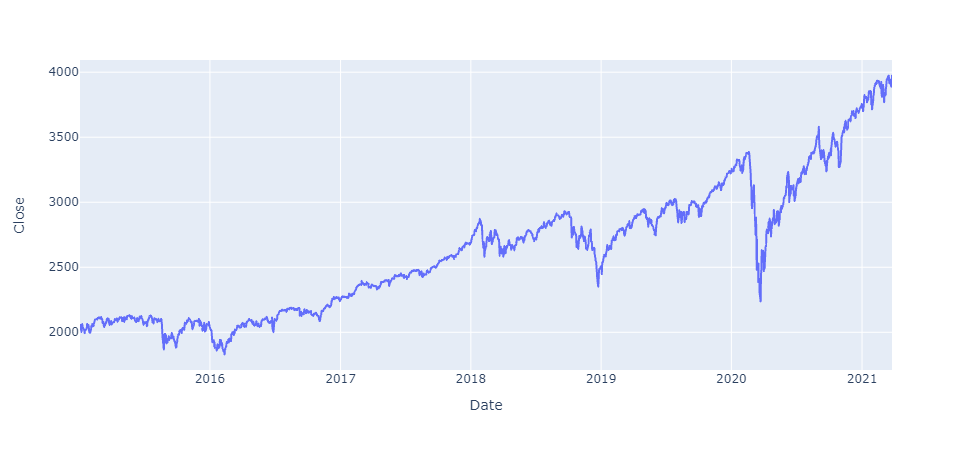

In [81]:
px.line(sp,y="Close")

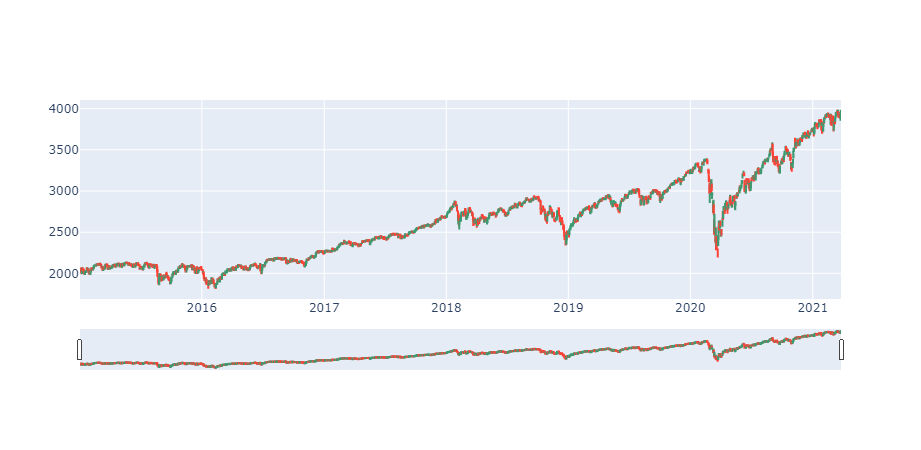

In [82]:
fig_kospi = go.Figure(data=[go.Candlestick(x=sp.index,
                                    open = sp["Open"],
                                    high = sp["High"],
                                    low = sp["Low"],
                                    close = sp["Close"]
                                    )])
fig_kospi.show()

In [72]:
code_list = ["KS11","US500"]
index_list = [fdr.DataReader(code, "2015")["Close"] for code in code_list]
ks_sp =pd.concat(index_list,axis=1)


In [75]:
ks_sp.columns = code_list
ks_sp.columns

Index(['KS11', 'US500'], dtype='object')

In [76]:
ks_sp

,KS11,US500
Date,,
2015-01-02,1926.44,2058.20
2015-01-05,1915.75,2020.58
2015-01-06,1882.45,2002.61
2015-01-07,1883.83,2025.90
2015-01-08,1904.65,2062.14
...,...,...
2021-03-23,3004.74,3910.52
2021-03-24,2996.35,3889.14
2021-03-25,3008.33,3909.52


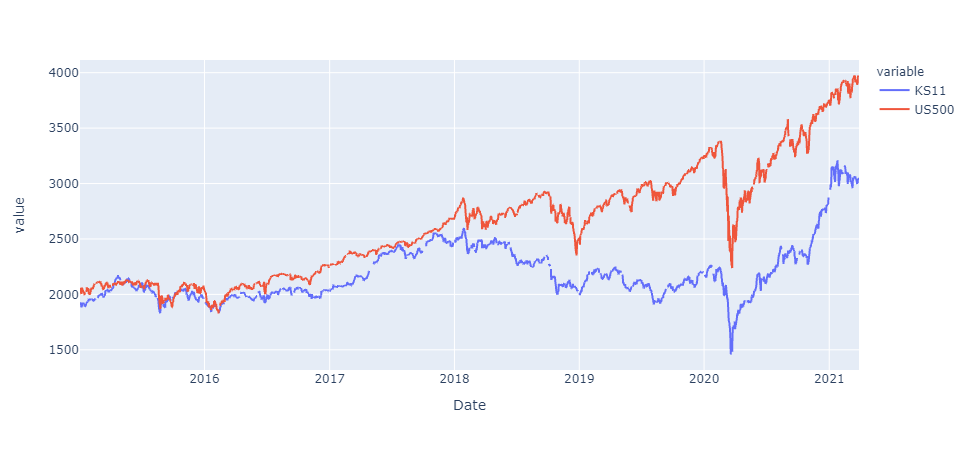

In [106]:
px.line(ks_sp)

In [87]:
df = fdr.DataReader('BTC/KRW')
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-05-23,3206000,3104000,3281000,3081000,21580.0,0.0329
2017-05-24,4175000,3206000,4314000,3206000,34680.0,0.3022
2017-05-25,4199000,4175000,4840000,3102000,35910.0,0.0057
2017-05-26,3227000,4199000,4200000,2900000,36650.0,-0.2315
2017-05-27,3152000,3227000,3288000,2460000,33750.0,-0.0232


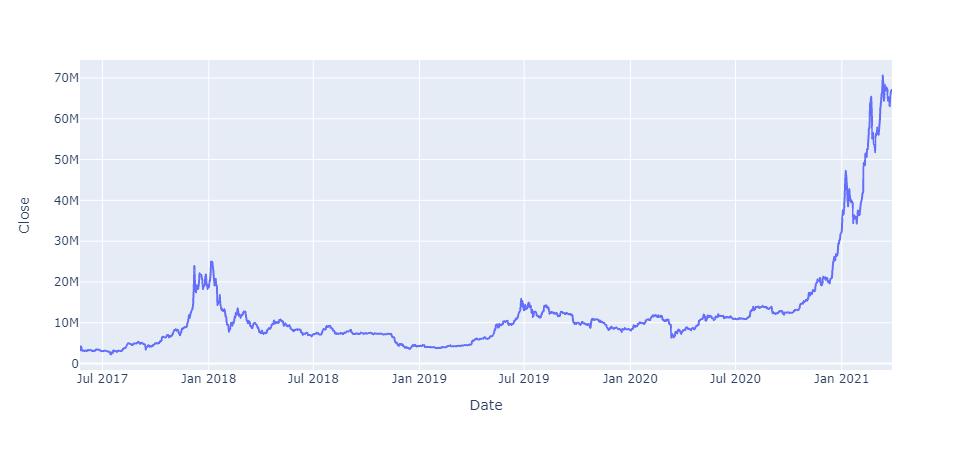

In [88]:
px.line(df,y="Close")

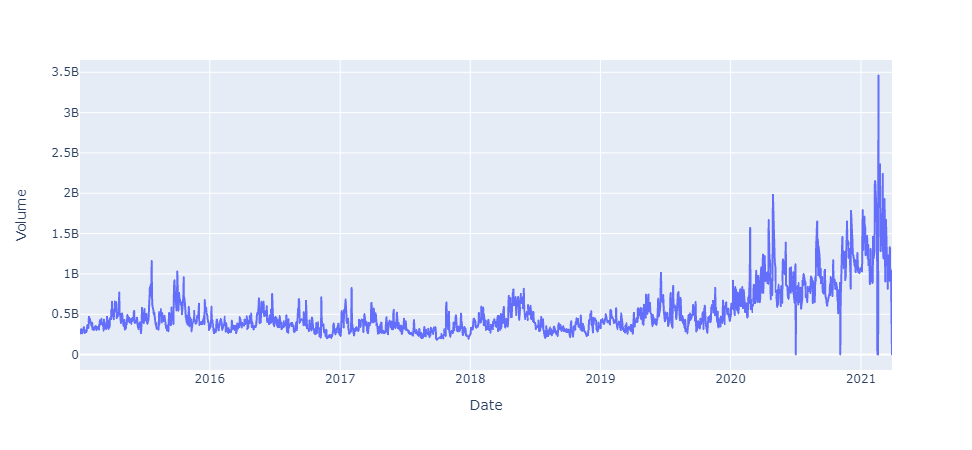

In [100]:
px.line(kospi,y="Volume")

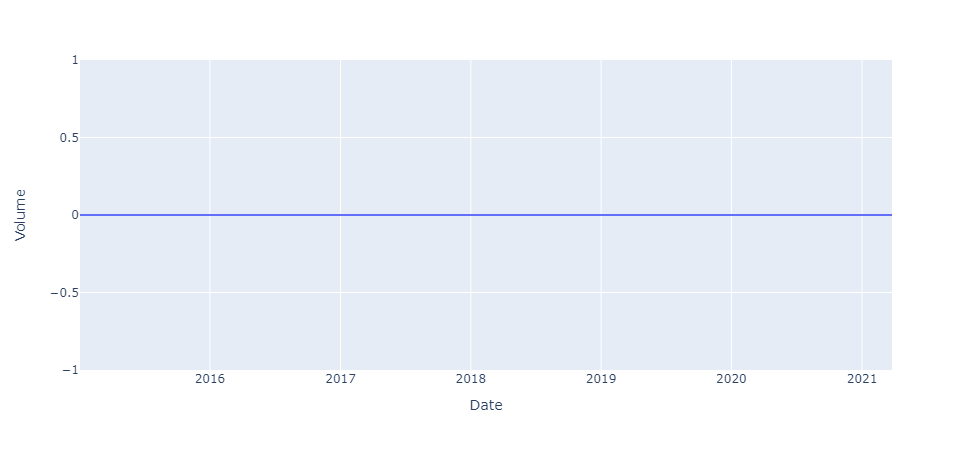

In [101]:
px.line(sp, y = "Volume")